In [1]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

In [7]:
hdul4 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_1D_f99.fits', mode='update')
header4 = hdul4[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header4['FLUXSCAL'] = 1
header4
    
hdul4.flush()

In [8]:
print(header4)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2245 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:34:44' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:34:44' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.07153320312 / RA at R

In [4]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [9]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file4 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_1D_f99.fits'

#load the data
wave4, flux4, hdr4 = import_1313_fits(fits_file4)

In [6]:
# Galaxy redshift and the flux normalization
z_obj = 0.001568
normFlux = 1

In [10]:
spec4 = lime.Spectrum(wave4, flux4, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

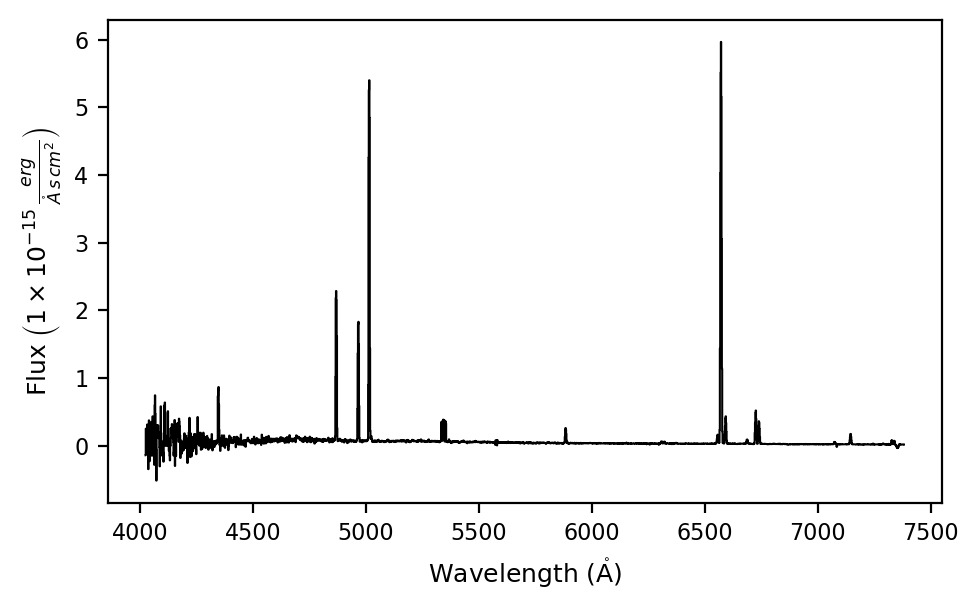

In [11]:
spec4.plot.spectrum(label='NGC1313')

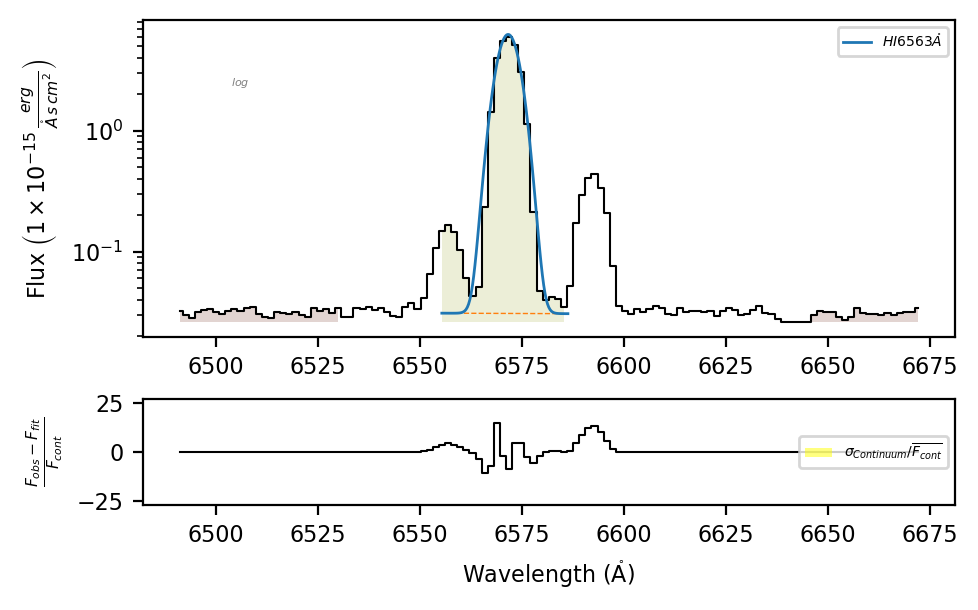

In [13]:
spec4.fit.bands(6563)
spec4.plot.bands()

In [22]:
# Line name and its location mask in the rest _frame
line4 = 'H1_6563A'
band_edges4 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

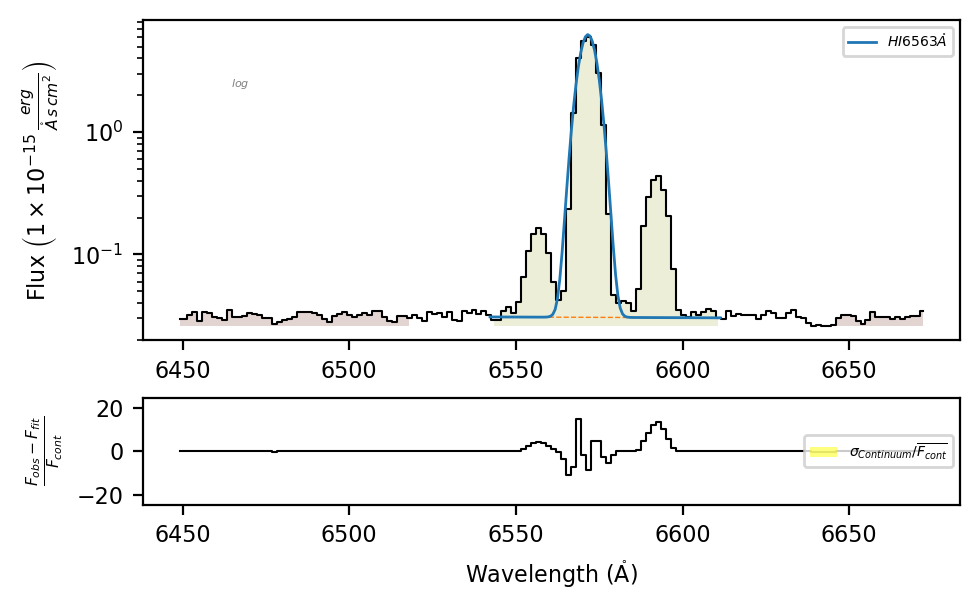

In [23]:
# Run the fitting and plot it
spec4.fit.bands(line4, band_edges4)
spec4.plot.bands()

In [24]:
# Fit configuration
line4 = 'H1_6563A_b'
fit_conf4 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

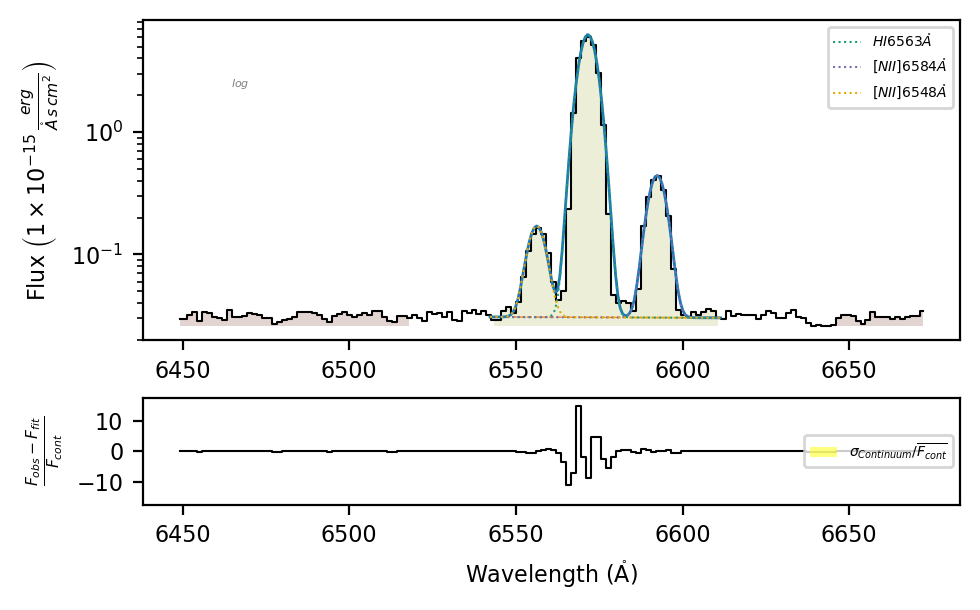

In [25]:
# New attempt including the fit configuration
spec4.fit.bands(line4, band_edges4, fit_conf=fit_conf4)
spec4.plot.bands()

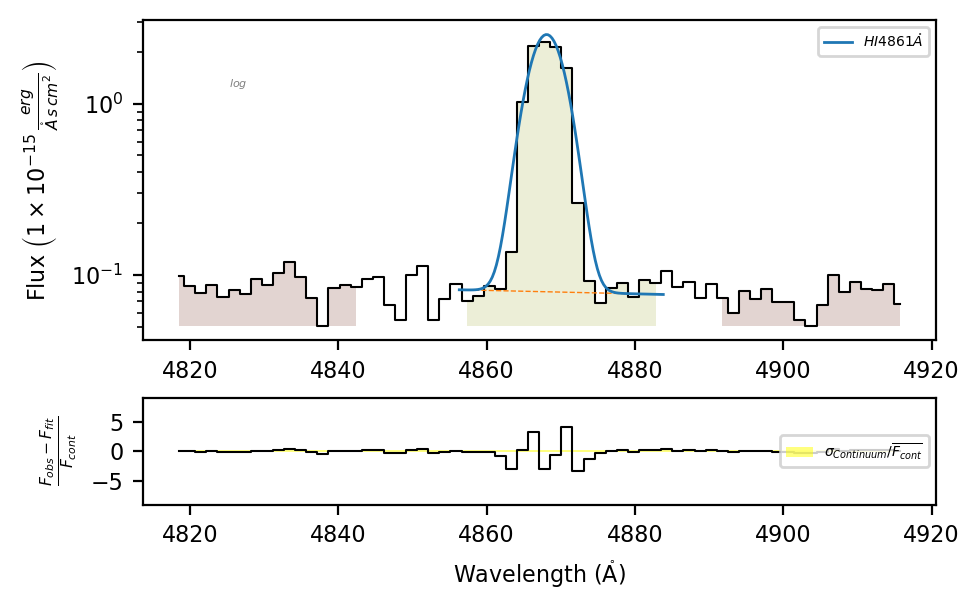

In [26]:
spec4.fit.bands(4861)
spec4.plot.bands()

In [27]:
spec4.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x130b74920>>

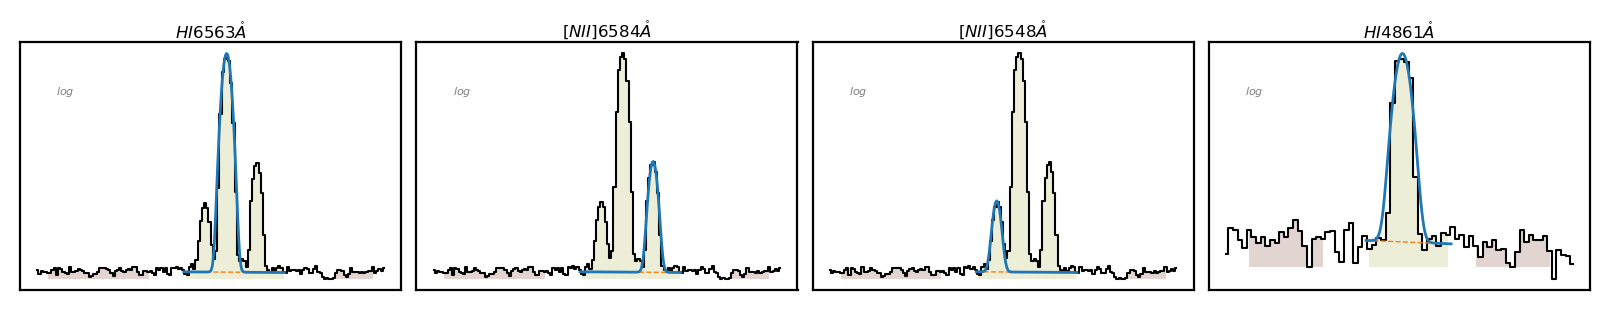

In [28]:
spec4.plot.grid()

In [29]:
spec4.save_frame('slit4_Hae_Hb_f99.txt')

SLIT 8

In [30]:
hdul8 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_1D_f99.fits', mode='update')
header8 = hdul8[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header8['FLUXSCAL'] = 1
header8
hdul8.flush()

In [31]:
print(header8)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2382 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:34:59' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:34:59' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4028.45336914063 / RA at R

In [32]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file8 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_1D_f99.fits'

#load the data
wave8, flux8, hdr8 = import_1313_fits(fits_file8)

In [33]:
spec8 = lime.Spectrum(wave8, flux8, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

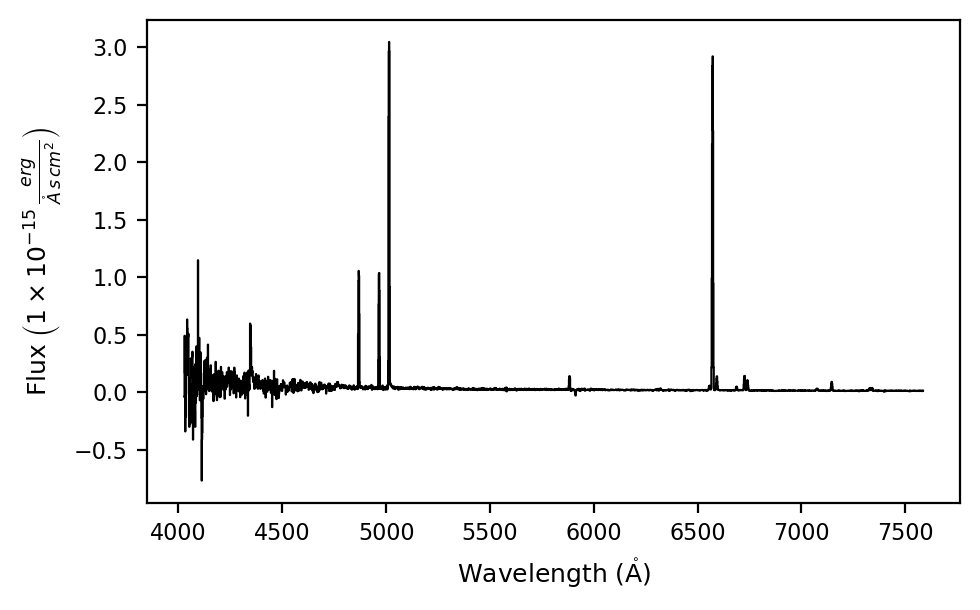

In [34]:
spec8.plot.spectrum(label='NGC1313')

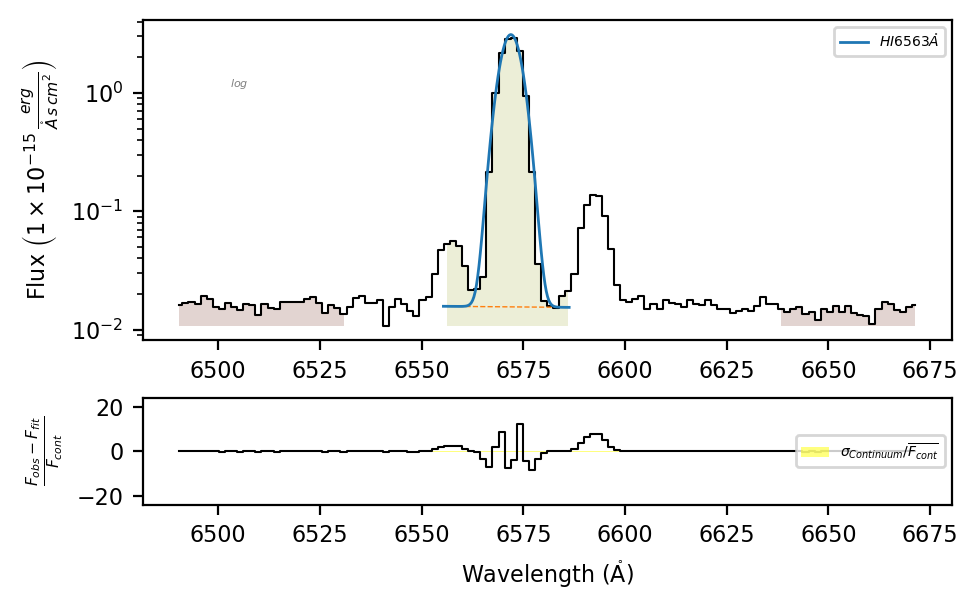

In [35]:
spec8.fit.bands(6563)
spec8.plot.bands()

In [36]:
# Line name and its location mask in the rest _frame
line8 = 'H1_6563A'
band_edges8 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

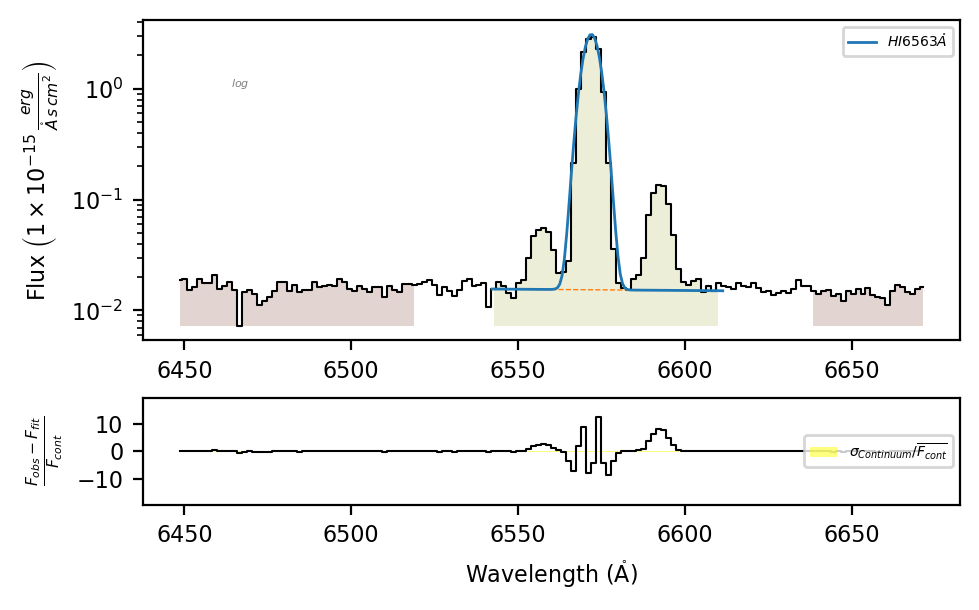

In [37]:
# Run the fitting and plot it
spec8.fit.bands(line8, band_edges8)
spec8.plot.bands()

In [38]:
# Fit configuration
line8 = 'H1_6563A_b'
fit_conf8 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

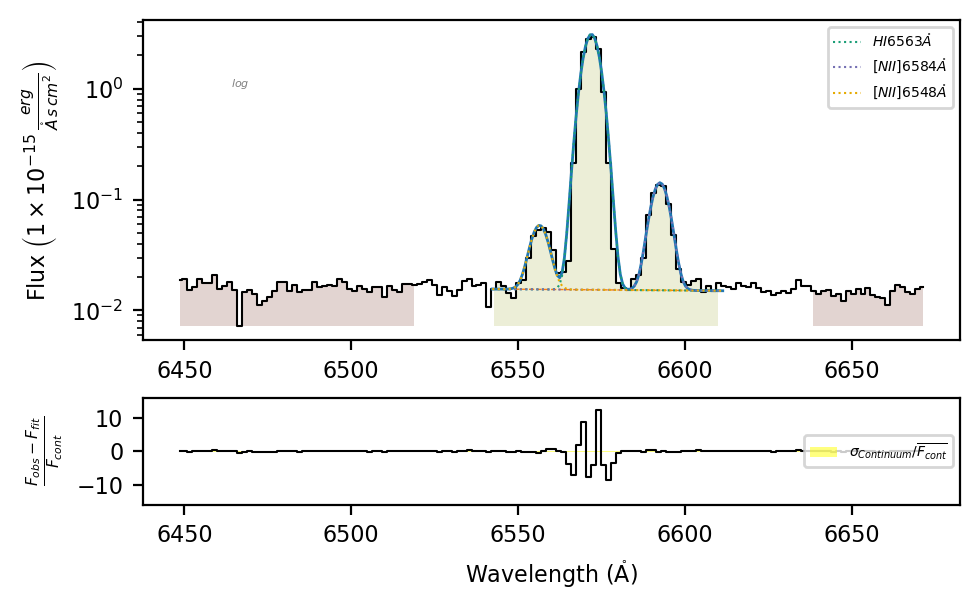

In [39]:
# New attempt including the fit configuration
spec8.fit.bands(line8, band_edges8, fit_conf=fit_conf8)
spec8.plot.bands()

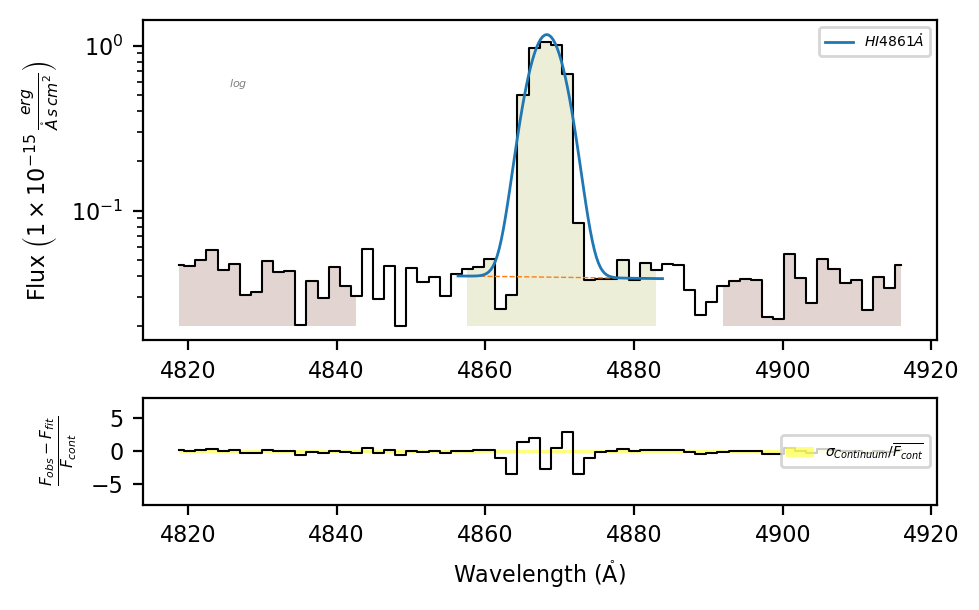

In [40]:
spec8.fit.bands(4861)
spec8.plot.bands()

In [41]:
spec8.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13394a480>>

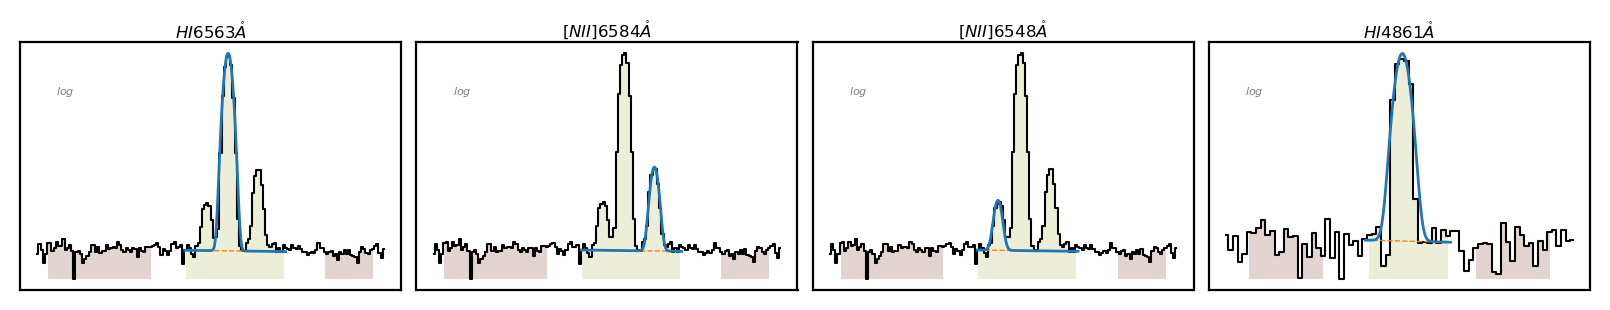

In [42]:
spec8.plot.grid()

In [43]:
spec8.save_frame('slit8_Hae_Hb_f99.txt')

SLIT 12

In [44]:
hdul12 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12_1D_f99.fits', mode='update')
header12 = hdul12[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header12['FLUXSCAL'] = 1
header12
hdul12.flush()

In [45]:
print(header12)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2440 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:06' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:06' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4031.98266601562 / RA at R

In [46]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file12 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12_1D_f99.fits'

#load the data
wave12, flux12, hdr12 = import_1313_fits(fits_file12)

In [47]:
spec12 = lime.Spectrum(wave12, flux12, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

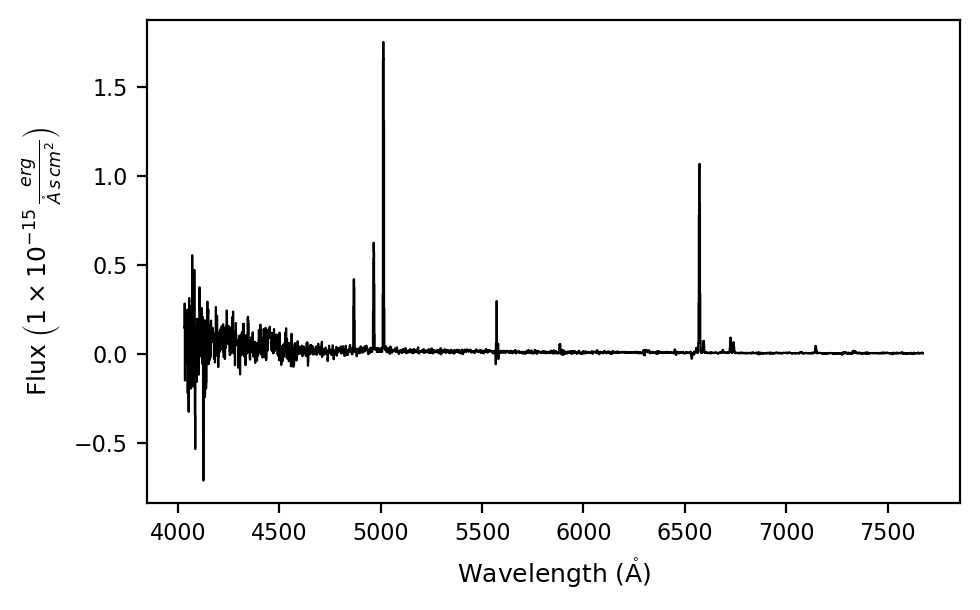

In [48]:
spec12.plot.spectrum(label='NGC1313')

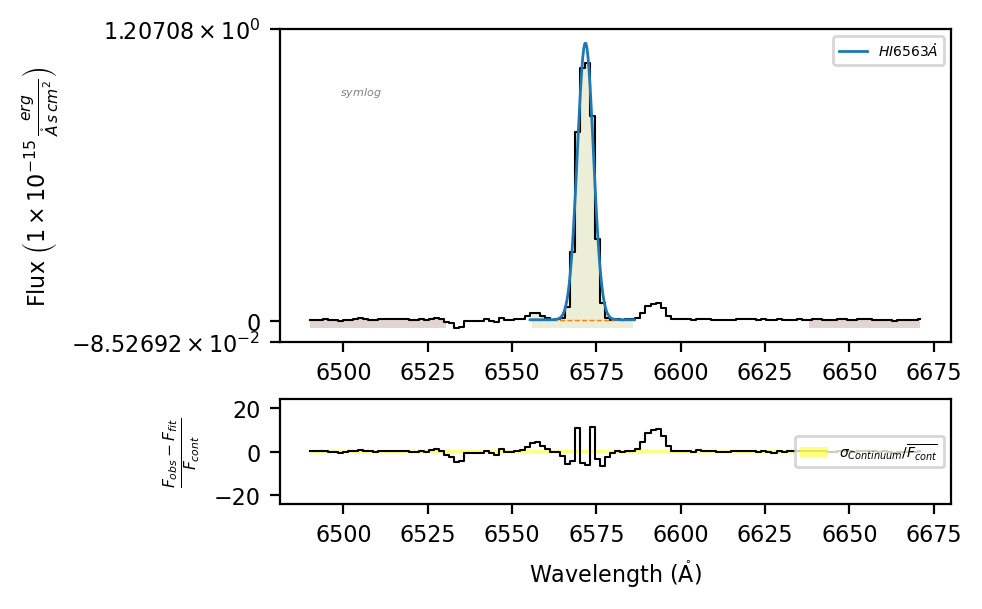

In [49]:
spec12.fit.bands(6563)
spec12.plot.bands()

In [50]:
# Line name and its location mask in the rest _frame
line12 = 'H1_6563A'
band_edges12 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

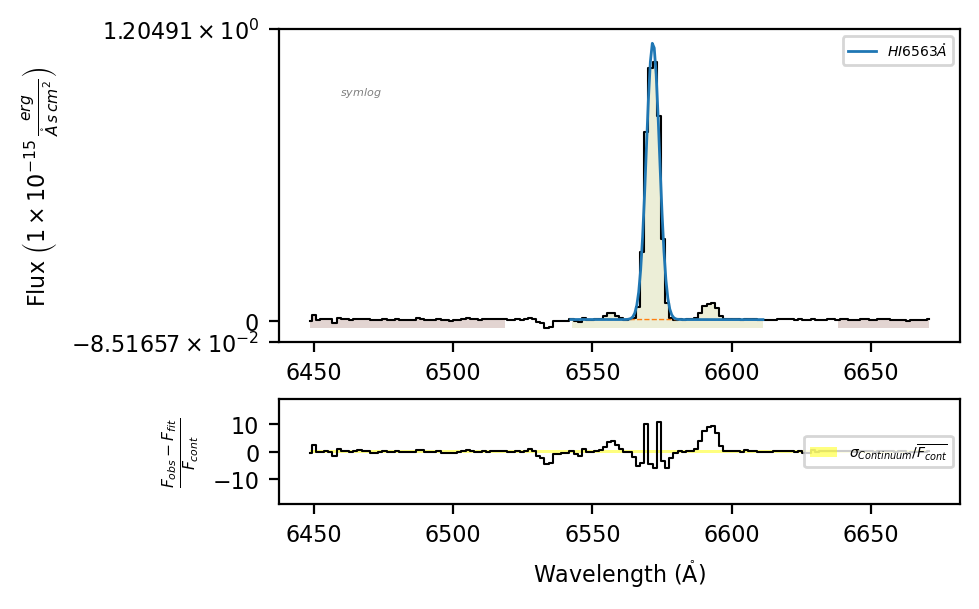

In [51]:
# Run the fitting and plot it
spec12.fit.bands(line12, band_edges12)
spec12.plot.bands()

In [52]:
# Fit configuration
line12 = 'H1_6563A_b'
fit_conf12 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

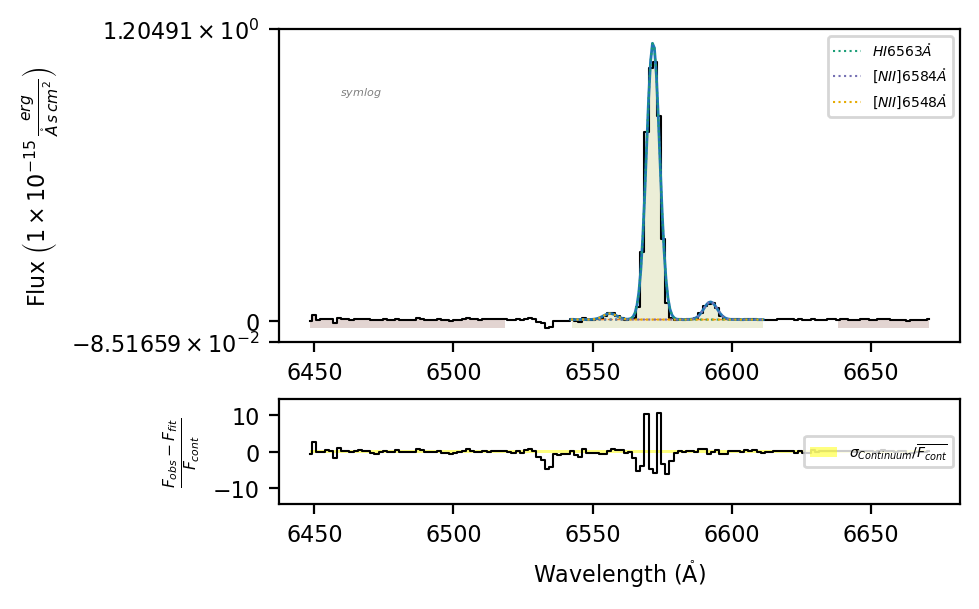

In [53]:
# New attempt including the fit configuration
spec12.fit.bands(line12, band_edges12, fit_conf=fit_conf12)
spec12.plot.bands()

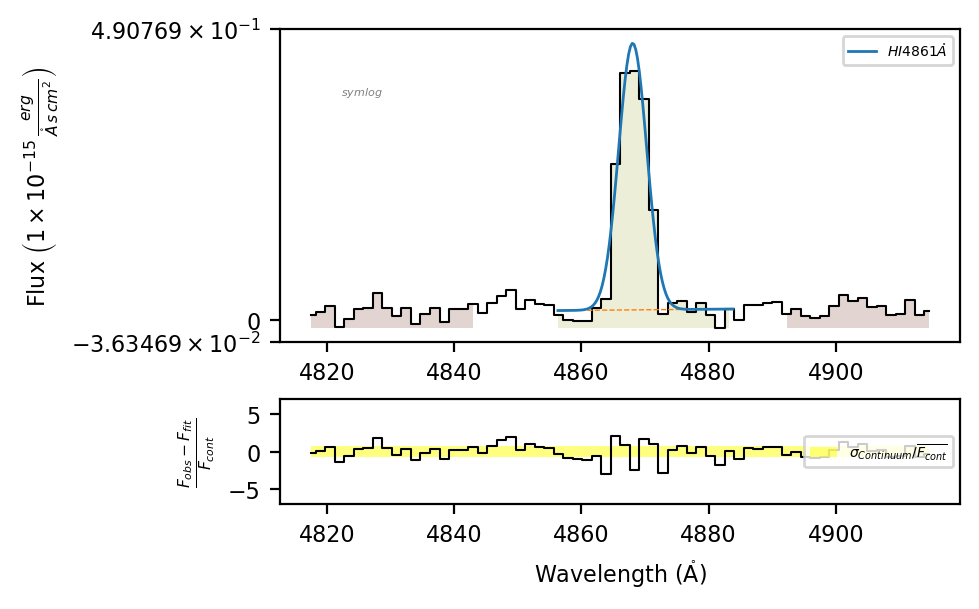

In [54]:
spec12.fit.bands(4861)
spec12.plot.bands()

In [55]:
spec12.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x133b0daf0>>

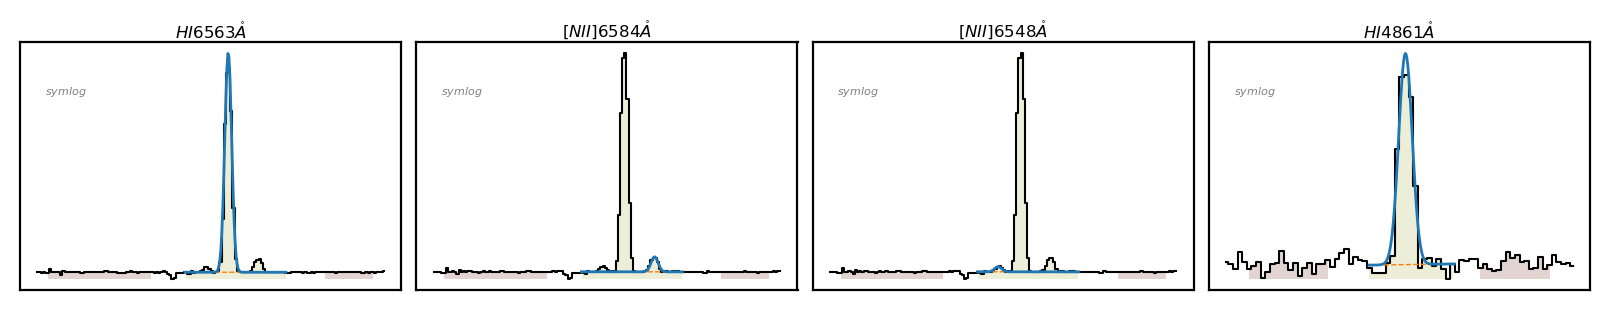

In [56]:
spec12.plot.grid()

In [57]:
spec12.save_frame('slit12_Hae_Hb_f99.txt')

SLIT 14

In [58]:
hdul14 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_1D_f99.fits', mode='update')
header14 = hdul14[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header14['FLUXSCAL'] = 1
header14
hdul14.flush()

In [59]:
print(header14)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2809 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:12' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:12' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4036.02270507813 / RA at R

In [60]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file14 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_1D_f99.fits'

#load the data
wave14, flux14, hdr14 = import_1313_fits(fits_file14)

In [61]:
spec14 = lime.Spectrum(wave14, flux14, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

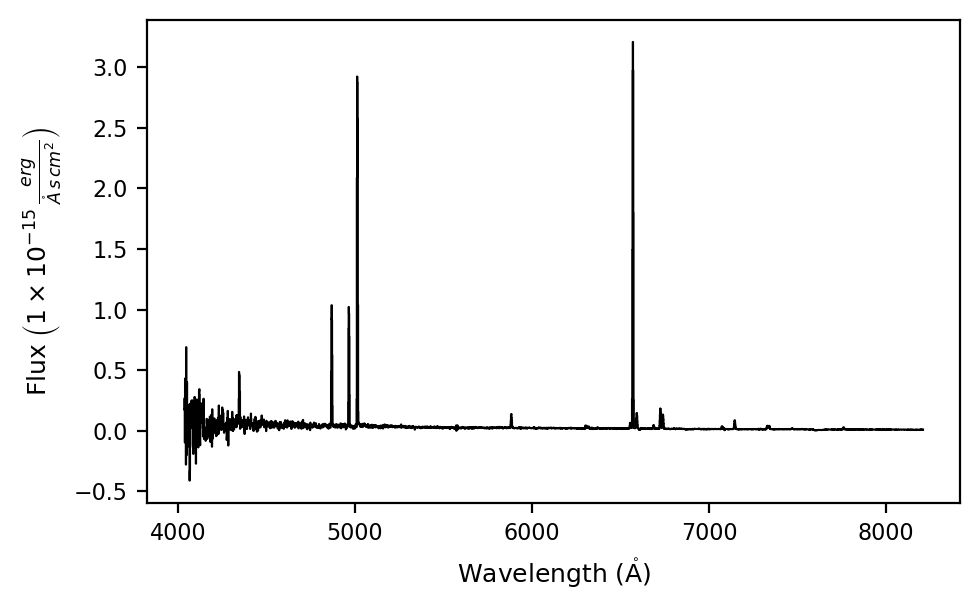

In [62]:
spec14.plot.spectrum(label='NGC1313')

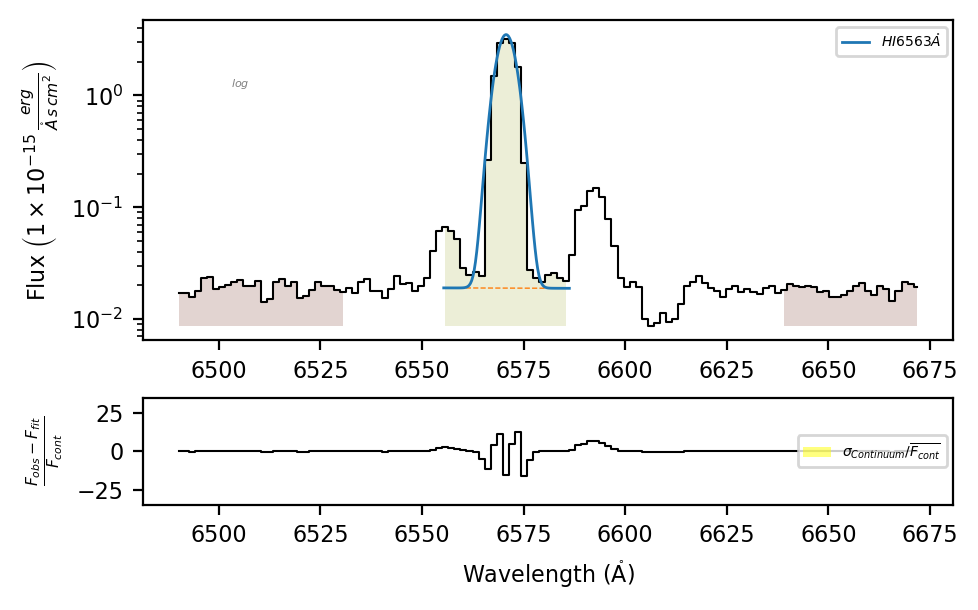

In [63]:
spec14.fit.bands(6563)
spec14.plot.bands()

In [84]:
# Line name and its location mask in the rest _frame
line14 = 'H1_6563A'
band_edges14 = np.array([6438.03, 6508.66, 6532, 6594, 6627.70, 6661.82])

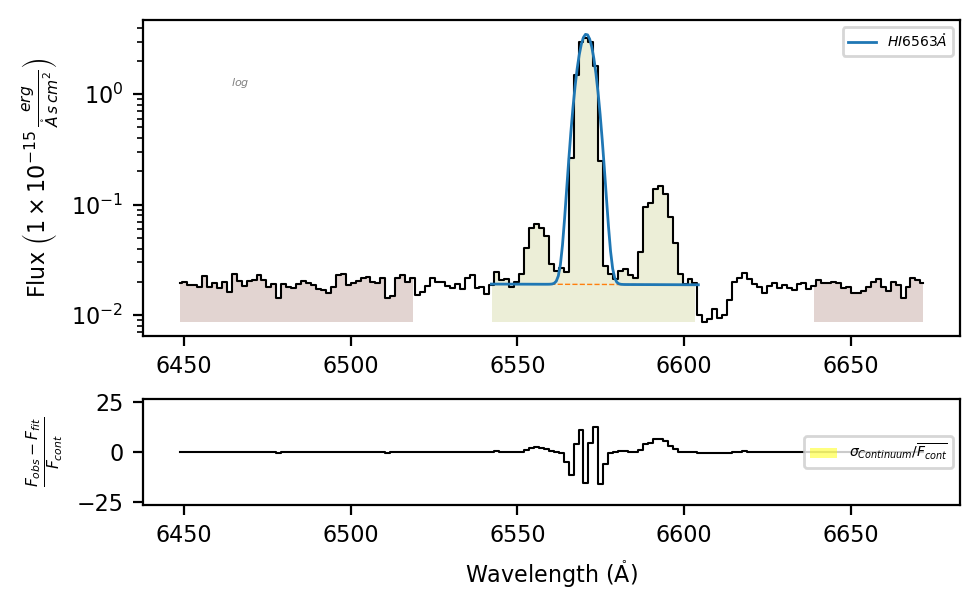

In [85]:
# Run the fitting and plot it
spec14.fit.bands(line14, band_edges14)
spec14.plot.bands()

In [86]:
# Fit configuration
line14 = 'H1_6563A_b'
fit_conf14 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

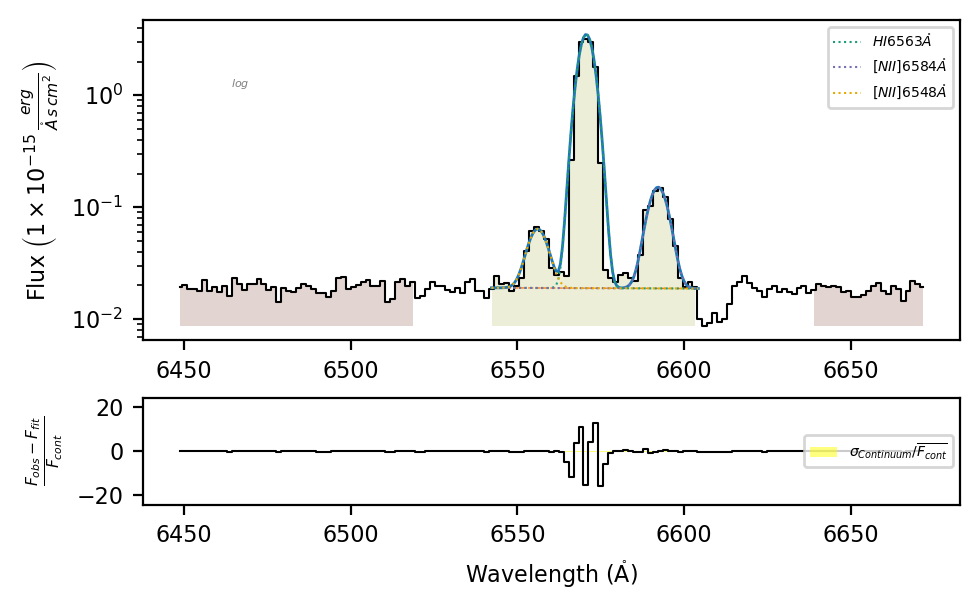

In [87]:
# New attempt including the fit configuration
spec14.fit.bands(line14, band_edges14, fit_conf=fit_conf14)
spec14.plot.bands()

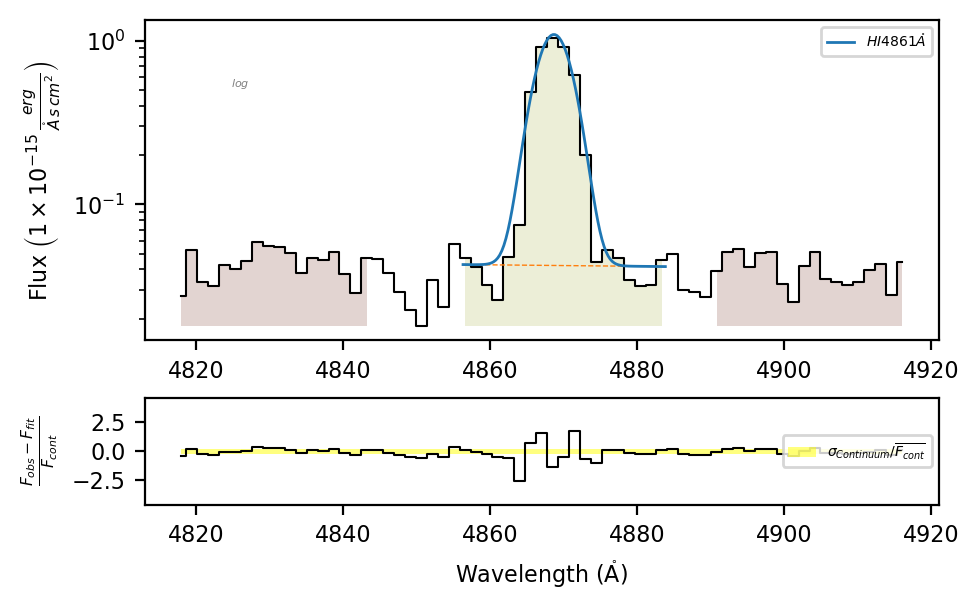

In [88]:
spec14.fit.bands(4861)
spec14.plot.bands()

In [89]:
spec14.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x134580bc0>>

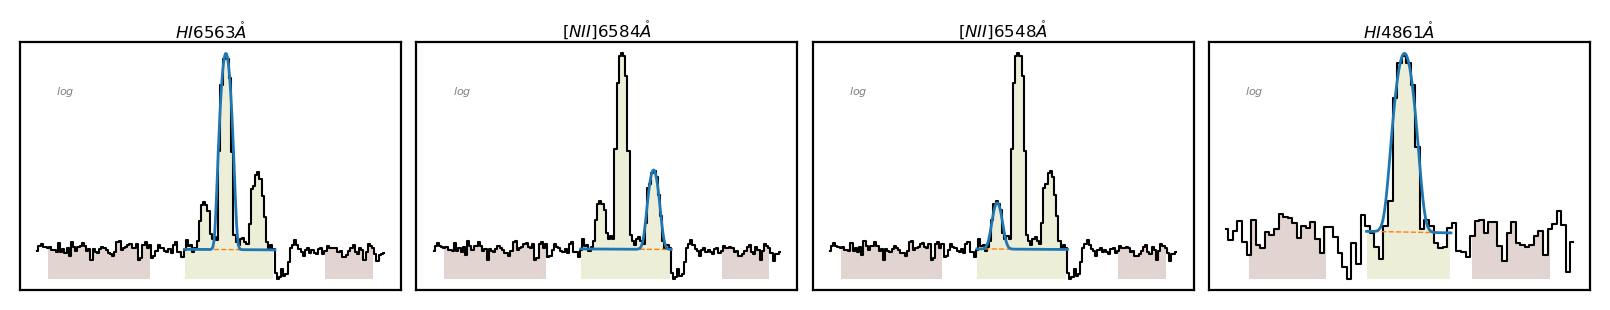

In [90]:
spec14.plot.grid()

In [92]:
spec14.save_frame('slit14_Hae_Hb_f99.txt')

SLIT 16